# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Spring 2024
- Instructor: Tom Bihari
- Section: Wednesday/Friday 12:45PM
- Student Name: Erik Thompson
- Student Email: thompson.3624@buckeyemail.osu.edu
- Student ID: 500367903

Template Version V9
***

***
# Section: Overview

### Objectives:

In this lab, you will perform clustering on three datasets.  Your will choose suitable clustering algorithms, evaluate them on the datasets, and compare their performance.

The objectives of this assignment are:
- Understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of a dataset and the outcomes you need.
- Understand how to tune and evaluate a clustering algorithm to achieve good performance.

### Datasets:

Three datasets are provided.  They are two-dimensional datasets.  They have different sizes (number of points) and shapes.  Each dataset contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm.  The files are:

- dataset1_Xydf.csv
- dataset2_Xydf.csv
- dataset3_Xydf.csv

### Approach:

This homework makes use of the Clustering Algorithms offered by the SciKitLearn Library.  Study the information at https://scikit-learn.org/stable/modules/clustering.html.  Follow the guidance in the individual sections below.

### Collaboration:

For this assignment, you must work as an individual. You may informally discuss ideas with classmates, to get advice on general Python usage, etc., but your work should be your own.  Please make use of Microsoft Teams for discussions with the intructor, TA, and classmates!

### What You Need to Turn In:

1. Code
- For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
- This homework requires you to use clustering algorithms in the SciKitLearn library.  You also may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…).  You may not use library operations that perform, in effect, the entire “core” computations for this homework. (e.g., If you happen to find a single function on the web that does essentially *all* of a major portion of the homework, you may not use it.)  When in doubt, ask the grader or instructor.
- The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
- The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
- When in doubt, ask the grader or instructor.

2. Written Report
- For this homework, the report **is** the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
- The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### How to Turn In Your Work on Carmen:

**Please follow these instructions exactly** - it helps the grading process.  If you have questions, please ask.  Submit your Jupyter Notebook **.ipynb file** to Carmen - **do not ZIP or PDF it**. You do not need to include the input data.

### Grading:

0. Overall readability and organization of your report (5%) - Is it well organized and does the presentation flow in a logical manner; are there many grammar and spelling mistakes; do the charts/graphs relate to the text, etc.
1. Setup and Helper Functions (5%) - Are the Helper Functions (if any) and overall notebook setup correct, well structured, and suitable for use?
2. Evaluation of the K-Means Clustering Algorithm on Dataset1 (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
3. Evaluation of the K-Means Clustering Algorithm on Dataset2 (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
4. Evaluation of a Second Clustering Algorithm on Dataset2 (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
5. Comparison of the two Clustering Algorithms on Dataset2 (5%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
6. Evaluation of the K-Means Clustering Algorithm on Dataset3 (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
7. Evaluation of a Second Clustering Algorithm on Dataset3 (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
8. Comparison of the two Clustering Algorithms on Dataset3 (5%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
9. Conclusions (5%) – Did you document your overall insights? 

### Instructions and Helpful Hints:
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Consider creating re-usable functions for some common operations - you will be doing the same sorts of things multiple times below.
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Teams if it is a general question, so everyone benefits.

### References and Acknowledgements:

1. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
2. https://scikit-learn.org/stable/modules/clustering.html
3. https://docs.python.org/3/library/time.html
4. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
5. https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels - this is just an example)
6. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (note that this is **mean** squared error)
***

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore')

#np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=120)

In [2]:
# HELPER FUNCTION - provided to you.  You may use this function or create your own visualizations.
def plot_clusters(title, X, y, size):
    import matplotlib.pyplot as plt
    
    # # This works, but may scale some datasets inappropriately.
    # # Probably should use 'equal' scaling in general, to be consistent with euclidean distance measures.
    # # See: https://www.pythonpool.com/matplotlib-aspect-ratio/
    # X0range = np.max(X[:,0]) - np.min(X[:,0])
    # X1range = np.max(X[:,1]) - np.min(X[:,1])
    # stretch = X0range / X1range
    stretch = 1.0
    
    plt.figure(figsize=(size * stretch, size))
    plt.title(title)
    plt.xlabel("X0") 
    plt.ylabel("X1")
    plt.scatter(X[:, 0], X[:, 1], s = 40, c = y[:]) 
    plt.show()
    plt.clf()

In [36]:
# HELPER FUNCTION - provided to you.  You may use this function or create your own.
def remap_cluster_labels(true_y, pred_y):
    # Rearrange the predicted cluster labels so they best match the true ones.
    # This function takes the true and predicted labels and returns the remapped predicted labels.
    # Situation: A clustering algorithm returns a set of cluster labels.  These labels typically will not be the same as the
    # true cluster labels (because the algorithm does not know anything about the true labels).  For example, the algorithm
    # may return (2,1,2,0,1,0,...) while the true labels are (0,2,0,1,2,1,...). Therefore it is necessary remap 2->0, 1->2,
    # and 0->1 when evaluating the quality of the algorithm.
    # Note: This code has not been tested for cases where there are negative cluster numbers (e.g., -1 for DbScan)
    #       or for cases where the true_y and pred_y matrices are of different lengths.
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
    from scipy.optimize import linear_sum_assignment

    conf_mat = confusion_matrix(true_y, pred_y)  #SciKitLearn convention is rows are true labels, cols are predicted labels
    
    # Find the optimal remapping of labels, so the predicted labels best match the true labels.
    # col_index is the predicted label; row_index is the true label to change it to.
    
    # Negate the costs so maximizing the assignment minimizes the mismatches
    row_index, col_index = linear_sum_assignment(conf_mat.max()-conf_mat)

    # Remap the predicted labels.
    new_pred_y = np.zeros(len(pred_y))
    for r in range(0,len(row_index)):
        old = col_index[r]  # the predicted y's
        new = row_index[r]  # remap to the corresponding true y's
        new_pred_y[pred_y == old] = new

    return new_pred_y  # return the remapped labels

In [37]:
def calculate_centroids(X, y):
    unique_labels = np.unique(y)
    centroids = []
    for label in unique_labels:
        cluster_points = X[y == label]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

In [38]:
# # SUGGESTION - consider creating functions like these. (YOUR CODE MAY VARY!)
def compute_WSS(my_df, labels, centroids):  # Columns are X0, X1
    wss = 0
    for i in range(len(centroids)):
        cluster_points = my_df[labels == i]
        cluster_center = centroids[i]
        distances = np.linalg.norm(cluster_points - cluster_center, axis=1)
        wss += np.sum(distances ** 2)
    return wss
def compute_BSS(my_df, labels, centroids):
    overall_centroid = np.mean(X, axis=0)
    bss = 0
    for i in range(len(centroids)):
        cluster_points = my_df[labels == i]
        centroid = centroids[i]
        bss += len(cluster_points) * np.linalg.norm(centroid - overall_centroid) ** 2
    return bss

def compute_all_sse(my_df, labels):  # Columns are X0, X1, y
    centroids = calculate_centroids(my_df, labels)
#     return sum_WSS, overall_SSE-sum_WSS, overall_SSE    #Total (overall) SSE is the sum of BSS and WSS
    wss = compute_WSS(my_df, labels, centroids)
    bss = compute_BSS(my_df, labels, centroids)
    return wss, bss, wss+bss

In [39]:
# # SUGGESTION - consider creating a function to print the evaluation results of the clustering. (YOUR CODE MAY VARY!)
def print_evaluation_results(title_string, model, X, true_y, running_time):
    pred_y = model.labels_
    pred_y = remap_cluster_labels(true_y, pred_y)
#     Print plots, WSS, BSS, total SSE, accuracy, confusion matrix, classification report, accuracy, running time, etc.
    wss, bss, total = compute_all_sse(X, model.labels_)
    print("WSS: ", wss, " BSS: ", bss, " Total: ", total)
    plot_clusters(title_string, X, pred_y, 5) 
    print(confusion_matrix(true_y, pred_y))
    print("Accuracy: ", accuracy_score(true_y, pred_y)) 
    print("Total time elapsed:", end-start, " seconds")
    
    

***
# Section: 1 - Evaluate the **K-Means** Algorithm on **Dataset1**
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
- Print all of the evaluation results.
***

In [6]:
dataset1_df = pd.read_csv('../data/dataset1_Xydf.csv')
X = dataset1_df[['X0','X1']].to_numpy()
true_y = dataset1_df['y'].to_numpy()

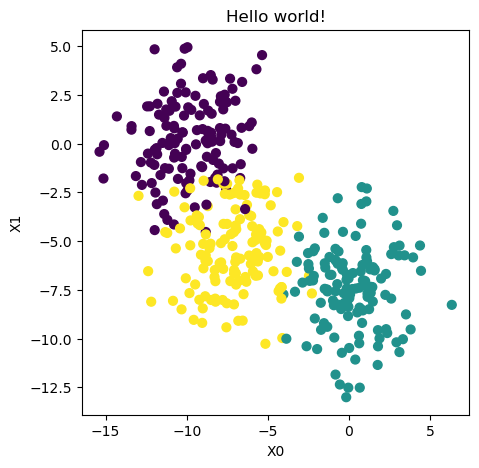

<Figure size 640x480 with 0 Axes>

In [7]:
plot_clusters("Hello world!", X, true_y, 5)  #temporary hack for example
#print_evaluation_results("DATASET1 TRUE CLUSTER MEASURES:", True, False, X, true_y, None, 0.0)

***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

WSS:  5512.949958485948  BSS:  9261.72196834581  Total:  14774.671926831757


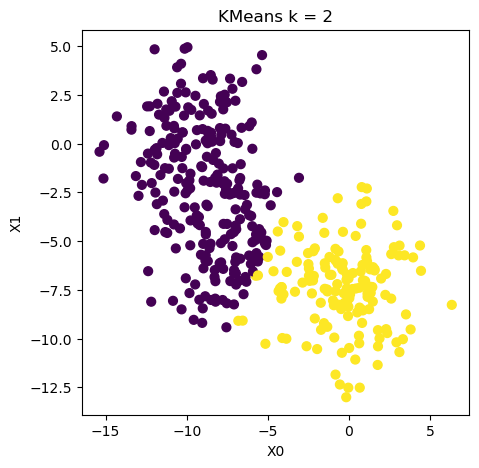

[[134   0   0]
 [  0 133   0]
 [113  20   0]]
Accuracy:  0.6675
Total time elapsed: 5.640625  seconds
WSS:  3161.7908033112562  BSS:  11612.881123520505  Total:  14774.671926831761


<Figure size 640x480 with 0 Axes>

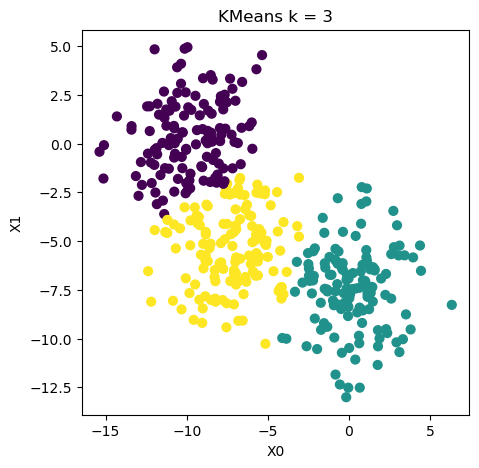

[[125   0   9]
 [  0 131   2]
 [  6   3 124]]
Accuracy:  0.95
Total time elapsed: 6.25  seconds
WSS:  2673.364536185749  BSS:  12101.307390646007  Total:  14774.671926831756


<Figure size 640x480 with 0 Axes>

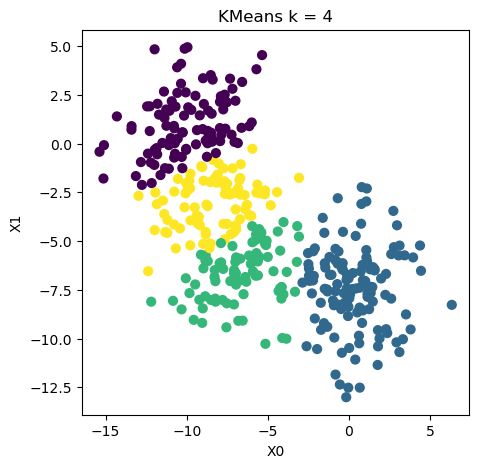

[[101   0   0  33]
 [  0 128   5   0]
 [  0   2  78  53]
 [  0   0   0   0]]
Accuracy:  0.7675
Total time elapsed: 5.78125  seconds


<Figure size 640x480 with 0 Axes>

In [23]:
for k in range(2,5):
    start = time.process_time()
    model = KMeans(n_clusters=k)
    model.fit(X)
    end = time.process_time()
    
    print_evaluation_results("KMeans k = " + str(k), model, X, true_y, end-start)
    

***
## Section: 1.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

I observed that K = 3 had a high accuracy of 95%. I prefer k= 3 since it has the highest accuracy. K= 2 had many of the second true cluster classified as split into 1 and 2 cluster. K=3 had clusters 2 and 3 as cluster 2 in true values.

***
# Section: 2 - Evaluate the **K-Means** Algorithm on **Dataset2**
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [48]:
 dataset2_df = pd.read_csv('../data/dataset2_Xydf.csv')
 X = dataset2_df[['X0','X1']].to_numpy()
 true_y = dataset2_df['y'].to_numpy()

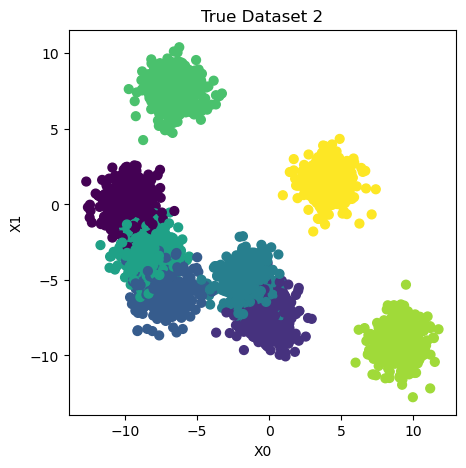

<Figure size 640x480 with 0 Axes>

In [49]:
plot_clusters("True Dataset 2", X, true_y, 5)  #temporary hack for example

In [51]:
compute_all_sse(X, true_y)

(6040.278624312814, 193933.6479207511, 199973.9265450639)

***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=7, 8, 9.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

WSS:  6949.526359806651  BSS:  193024.40018525725  Total:  199973.9265450639


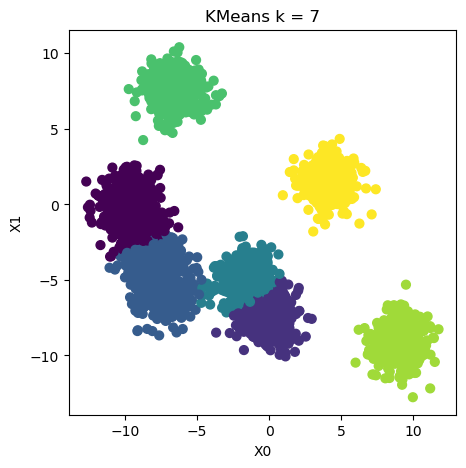

[[375   0   0   0   0   0   0   0]
 [  0 351   0  24   0   0   0   0]
 [  0   0 370   5   0   0   0   0]
 [  0  27   1 347   0   0   0   0]
 [108   0 267   0   0   0   0   0]
 [  0   0   0   0   0 375   0   0]
 [  0   0   0   0   0   0 375   0]
 [  0   0   0   0   0   0   0 375]]
Accuracy:  0.856
Total time elapsed: 6.6875  seconds
WSS:  5660.63951212654  BSS:  194313.2870329374  Total:  199973.92654506394


<Figure size 640x480 with 0 Axes>

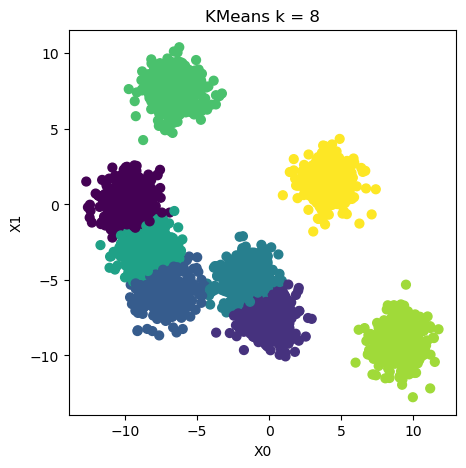

[[355   0   0   0  20   0   0   0]
 [  0 347   0  28   0   0   0   0]
 [  0   0 341   1  33   0   0   0]
 [  0  25   1 349   0   0   0   0]
 [ 20   0  20   0 335   0   0   0]
 [  0   0   0   0   0 375   0   0]
 [  0   0   0   0   0   0 375   0]
 [  0   0   0   0   0   0   0 375]]
Accuracy:  0.9506666666666667
Total time elapsed: 5.578125  seconds
WSS:  5334.755458478427  BSS:  194639.17108658547  Total:  199973.9265450639


<Figure size 640x480 with 0 Axes>

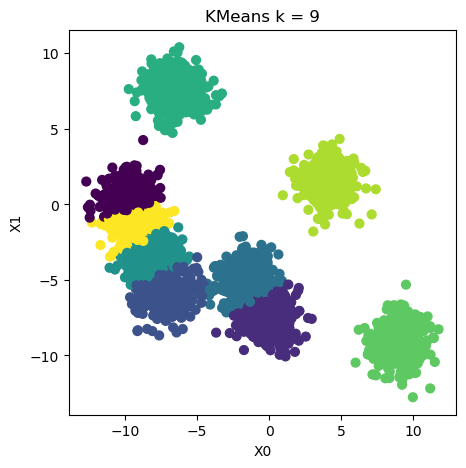

[[264   0   0   0   0   0   0   0 111]
 [  0 347   0  28   0   0   0   0   0]
 [  0   0 327   1  47   0   0   0   0]
 [  0  25   1 349   0   0   0   0   0]
 [  0   0  10   0 275   0   0   0  90]
 [  1   0   0   0   0 374   0   0   0]
 [  0   0   0   0   0   0 375   0   0]
 [  0   0   0   0   0   0   0 375   0]
 [  0   0   0   0   0   0   0   0   0]]
Accuracy:  0.8953333333333333
Total time elapsed: 5.453125  seconds


<Figure size 640x480 with 0 Axes>

In [53]:
for k in range (7,10):
    start = time.process_time()
    model = KMeans(n_clusters=k)
    model.fit(X)
    end = time.process_time()
    
    print_evaluation_results("KMeans k = " + str(k), model, X, true_y, end-start)
    

***
## Section: 2.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

I observed high accuracy for K = 8. This evaluation's WSS BSS and total was very close to true values too. This accuracy was 5% higher than k =9 and 10% higher than k = 7. I prefer K = 8 for these reasons.

***
# Section: 3 - Evaluate a **Second** Clustering Algorithm on **Dataset2**
***

***
## Section: 3.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

 I chose agglomerative clustering to merge seperated data points into their own clusters. There are 4 clusters of data that are clearly seperated in the true graph.

***
## Section: 3.2 - Configure and Run the Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for (at least) two variations of the configuration settings (if any).
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

WSS:  7435.501651232214  BSS:  192538.42489383178  Total:  199973.926545064


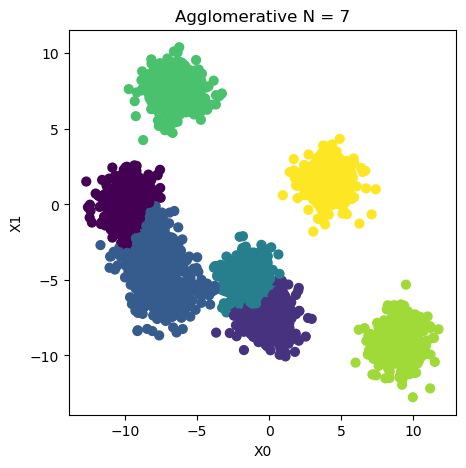

[[350   0  25   0   0   0   0   0]
 [  0 341   0  34   0   0   0   0]
 [  0   0 375   0   0   0   0   0]
 [  0  25   8 342   0   0   0   0]
 [ 37   0 338   0   0   0   0   0]
 [  0   0   0   0   0 375   0   0]
 [  0   0   0   0   0   0 375   0]
 [  0   0   0   0   0   0   0 375]]
Accuracy:  0.8443333333333334
Total time elapsed: 0.1875  seconds
WSS:  5919.317309063981  BSS:  194054.60923599993  Total:  199973.9265450639


<Figure size 640x480 with 0 Axes>

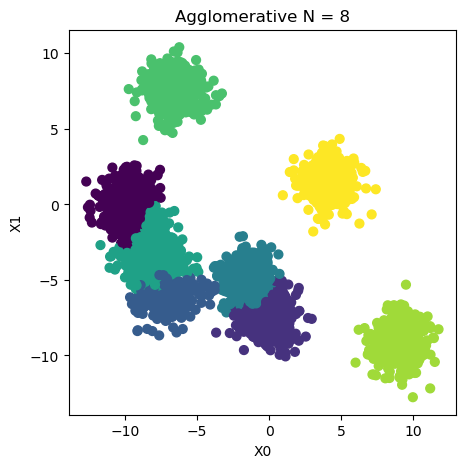

[[350   0   0   0  25   0   0   0]
 [  0 341   0  34   0   0   0   0]
 [  0   0 280   0  95   0   0   0]
 [  0  25   8 342   0   0   0   0]
 [ 37   0   6   0 332   0   0   0]
 [  0   0   0   0   0 375   0   0]
 [  0   0   0   0   0   0 375   0]
 [  0   0   0   0   0   0   0 375]]
Accuracy:  0.9233333333333333
Total time elapsed: 0.1875  seconds
WSS:  5609.841915956774  BSS:  194364.08462910715  Total:  199973.92654506394


<Figure size 640x480 with 0 Axes>

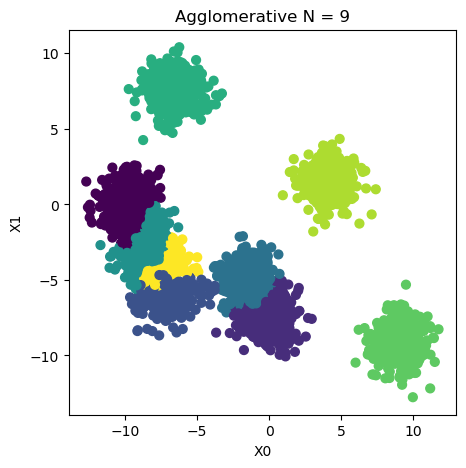

[[350   0   0   0  25   0   0   0   0]
 [  0 341   0  34   0   0   0   0   0]
 [  0   0 280   0  13   0   0   0  82]
 [  0  25   8 342   0   0   0   0   0]
 [ 37   0   6   0 257   0   0   0  75]
 [  0   0   0   0   0 375   0   0   0]
 [  0   0   0   0   0   0 375   0   0]
 [  0   0   0   0   0   0   0 375   0]
 [  0   0   0   0   0   0   0   0   0]]
Accuracy:  0.8983333333333333
Total time elapsed: 0.1875  seconds


<Figure size 640x480 with 0 Axes>

In [54]:
for k in range(7,10):
    start = time.process_time()
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(X)
    end = time.process_time()
    
    print_evaluation_results("Agglomerative N = " + str(k), model, X, true_y, end-start)
    

***
## Section: 3.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

I observed almost equal high level of accuracy for K = 8 almost equal to Kmeans algorithm. Preferred K level of 8. WSS, BSS, and total almost matched exactly to true values.

***
# Section: 4 - Comparison of the Two Clustering Algorithms on **Dataset2**
***

***
## Section: 4.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

Over 90% accuracy for both models means good performance versus the true clustering. The data had one blob in the lower left that was very large meaning that agglomerative clustering confused more data points for wrong clusters than KMeans algorithm. This means it had slightly lower accuracy of 92%.

***
## Section: 4.2 - Choose the Better Clustering Algorithm
- Choose one of the two clustering algorithm as better and explain why.
***

I choose KMeans algorithm since it had the highest accuracy of 95%.

***
# Section: 5 - Evaluate the **K-Means** Algorithm on **Dataset3**
***

***
## Section: 5.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [55]:
 dataset3_df = pd.read_csv('../data/dataset3_Xydf.csv')
 X = dataset3_df[['X0','X1']].to_numpy()
 true_y = dataset3_df['y'].to_numpy()

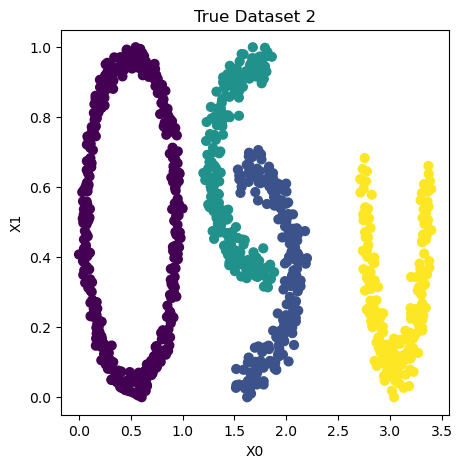

<Figure size 640x480 with 0 Axes>

In [56]:
plot_clusters("True Dataset 2", X, true_y, 5)  #temporary hack for example

In [58]:
compute_all_sse(X, true_y)

(114.88626369566228, 428.80341029554035, 543.6896739912027)

***
## Section: 5.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=3, 4, 5.
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

WSS:  156.03090670766997  BSS:  902.0760334144074  Total:  1058.1069401220775


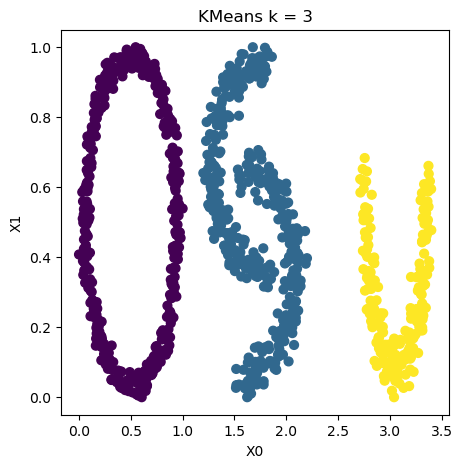

[[400   0   0   0   0]
 [  0 200   0   0   0]
 [  0 200   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0 200   0]]
Accuracy:  0.6
Total time elapsed: 5.640625  seconds
WSS:  120.71744372211953  BSS:  937.3894963999583  Total:  1058.1069401220777


<Figure size 640x480 with 0 Axes>

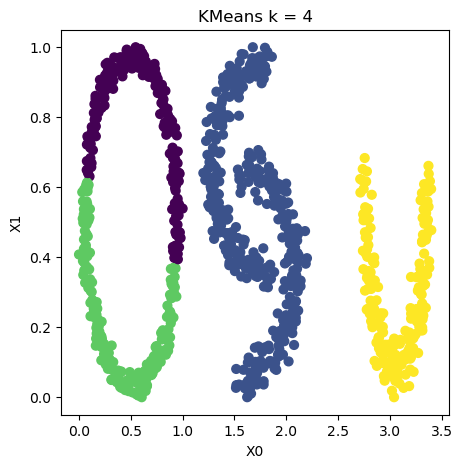

[[200   0   0 200   0]
 [  0 200   0   0   0]
 [  0 200   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0 200]]
Accuracy:  0.6
Total time elapsed: 5.421875  seconds
WSS:  87.24910480067493  BSS:  970.8578353214026  Total:  1058.1069401220775


<Figure size 640x480 with 0 Axes>

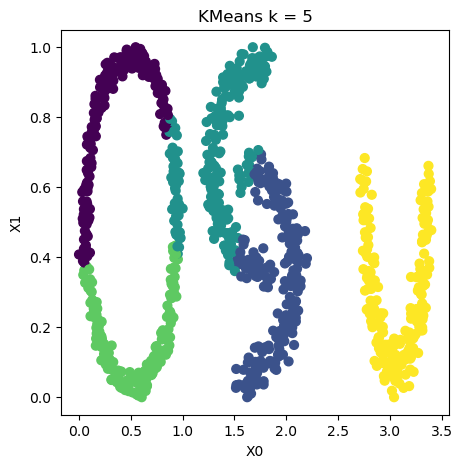

[[179   0  51 170   0]
 [  0 184  16   0   0]
 [  0  38 162   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0 200]]
Accuracy:  0.725
Total time elapsed: 5.140625  seconds


<Figure size 640x480 with 0 Axes>

In [57]:
for k in range(3,6):
    start = time.process_time()
    model = KMeans(n_clusters=k)
    model.fit(X)
    end = time.process_time()
    
    print_evaluation_results("KMeans k = " + str(k), model, X, true_y, end-start)

***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

Low accuracy of 0.725 for K = 5. Prefered value of K = 5. WSS, BSS, and total varied greatly.

***
# Section: 6 - Evaluate a **Second** Clustering Algorithm on **Dataset3**
***

***
## Section: 6.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

I choose agglomerative clustering since the clusters are seperated and attached to one another in the shapes of letters.

***
## Section: 6.2 - Configure and Run the Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for (at least) two variations of the configuration settings (if any).
- For each run:
  - Compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
  - Create a scatterplot of your clustering.
    - To assist in comparison, consider creating two adjacent scatterplots (true vs predicted), or overlaying the true and predicted clusterings on one scatterplot.
  - Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report). - Explain all configuration parameter values you chose, and why you chose them.
Note that you may need to "match up" the true and assigned cluster labels.  See the helper function above and the linear-sum-assignment and Hungarian algorithm references.
***

WSS:  130.48426309763101  BSS:  927.6226770244464  Total:  1058.1069401220775


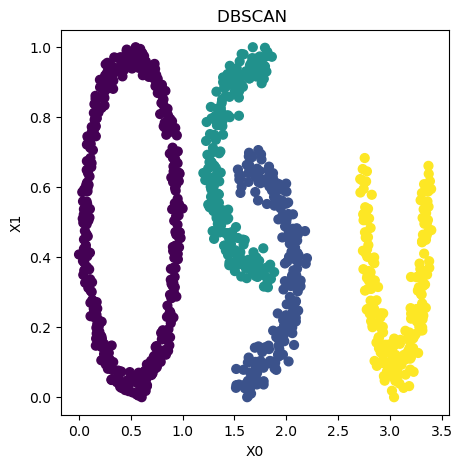

[[400   0   0   0]
 [  0 200   0   0]
 [  0   0 200   0]
 [  0   0   0 200]]
Accuracy:  1.0
Total time elapsed: 0.0  seconds


<Figure size 640x480 with 0 Axes>

In [63]:

start = time.process_time()
model = DBSCAN(eps=0.1)
model.fit(X)
end = time.process_time()
    
print_evaluation_results("DBSCAN ", model, X, true_y, end-start)
    

***
## Section: 6.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

I observed extremely high perfect accuracy of 100%. I prefer setting of eps = 0.1 which is much lower than default 0.5. This is because the maximum distance to be in the neighbor hood of one another is low for each cluster in the OSU Lettering. Each cluster has points very close to one another but in a weird shape compared to default circle.

***
# Section: 7 - Comparison of the Two Clustering Algorithms on **Dataset3**
***

***
## Section: 7.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

DBScan is better because it had a perfect accuracy of 100% with low eps setting. Kmeans was also good with over 90% accuracy. The data had very closely linked data points in the shapes of letters made it different from default circles. DBScan was able to link the four clusters in shapes of letters and get 100% without noise points.

***
## Section: 7.2 - Choose the Better Clustering Algorithm
- Choose one of the two clustering algorithm as better and explain why.
***

I choose DBSCAN because it had 100% accuracy.

***
# Section: 8 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

I learned much about modeling clustering algorithms. I learned how to calculate WSS and BSS with formula and code with help of online resources. I learned how to code functions to plot with matlab py plot and compare graphs by scrolling up and down. It was fun comparing the different models and trying to model OSU letters with different algorithms.

***
### END-OF-SUBMISSION
***